In [100]:
%pip install openai
%pip install dotenv
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [99]:
from openai.types import CompletionChoice
from typing import List, Optional, Dict, TypedDict

class LogProbsDict(TypedDict):
    text_offset: List[int]
    token_logprobs: List[float] # probabilities that has to be taken for the next tokens
    tokens: List[str] # tokens, that were taken for the prompt context
    top_logprobs: List[Dict[str, float]] # calculated probabilites for the next occurent tokens

In [101]:
from dotenv import load_dotenv
load_dotenv()

True

In [102]:
import os

key = os.getenv('OPENAI_KEY')
if key is not None:
    print("OPENAI_KEY exists")

OPENAI_KEY exists


## GPT-3.5 Demo: Prompt "Italien hat die beste" (Temperature = 0)

This section demonstrates how to use OpenAI's GPT-3.5 model to generate token predictions for the German prompt "Italien hat die beste" with a temperature setting of 0. A temperature of 0 makes the model deterministic, always choosing the most likely next token. The workflow includes retrieving token probabilities and visualizing the top token candidates for each position.

In [262]:
from openai import OpenAI

client = OpenAI(
    api_key=key,
)

response_temp_0 = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt="Italien hat die beste",
    max_tokens=2,
    logprobs=10,
    temperature=0
)

In [263]:
choices: CompletionChoice = response_temp_0.choices[0]
obj = choices.model_dump()

logprobs: Optional[LogProbsDict] = obj.get("logprobs")

### Token Prediction Result (Temperature = 0)

For the prompt "Italien hat die beste" with temperature set to 0, the model predicted the next two tokens as "Kü" and "che". At temperature 0, the model always selects the next token with the highest probability (i.e., the lowest negative log probability score), resulting in deterministic output.

In [264]:
import pandas as pd

token_candidates = logprobs.get('tokens')
token_probs = logprobs.get('token_logprobs')
next_tokens = pd.DataFrame([token_candidates, token_probs])
next_tokens.T

,0,1
0,Kü,-1.909545
1,che,-0.070941


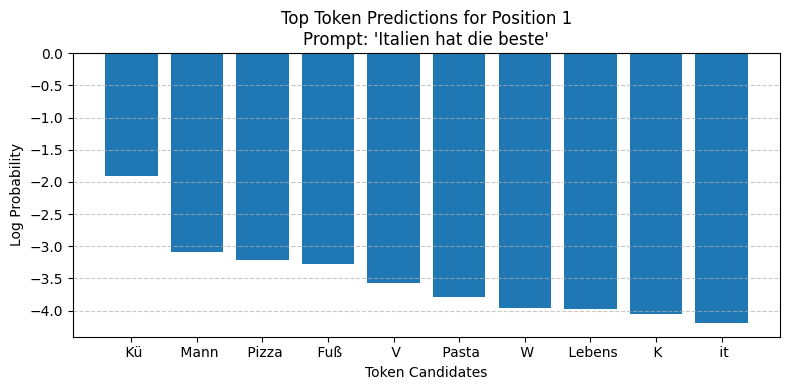

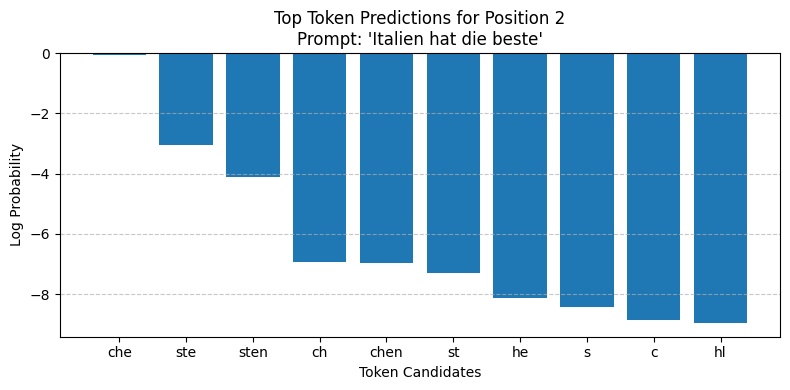

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

top_candidates = logprobs.get('top_logprobs')

# Process each token position
for idx, token_dict in enumerate(top_candidates):
    df = pd.DataFrame(token_dict.items(), columns=["token", "log_prob"])
    
    # Plot log probs directly
    plt.figure(figsize=(8, 4))
    plt.bar(df["token"], df["log_prob"])
    plt.xlabel("Token Candidates")
    plt.ylabel("Log Probability")
    plt.title(f"Top Token Predictions for Position {idx + 1}\nPrompt: 'Italien hat die beste'")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [275]:
rows_0, cols_0 = [], []

for k, v in top_candidates[0].items():
    rows_0.append(k)
    cols_0.append(v)

pd.DataFrame([rows_0, cols_0]).T

,0,1
0,Kü,-1.909545
1,Mann,-3.086459
2,Pizza,-3.209649
3,Fuß,-3.28192
4,V,-3.563044
5,Pasta,-3.788603
6,W,-3.955809
7,Lebens,-3.96799
8,K,-4.049636
9,it,-4.195041


In [276]:
rows_1, cols_1 = [], []

for k, v in top_candidates[1].items():
    rows_1.append(k)
    cols_1.append(v)

pd.DataFrame([rows_1, cols_1]).T

,0,1
0,che,-0.070941
1,ste,-3.032206
2,sten,-4.124024
3,ch,-6.934836
4,chen,-6.973887
5,st,-7.302436
6,he,-8.119468
7,s,-8.426507
8,c,-8.862472
9,hl,-8.960635


### Token Prediction Result (Temperature = 0.85)

With temperature set to 0.85, the model introduces randomness into token selection, allowing for more diverse outputs rather than always choosing the most probable token. For the prompt "Italien hat die beste", the model selected "Fuß" instead of "Ku", demonstrating the effect of higher temperature on token prediction.

In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key=key,
)

response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt="Italien hat die beste",
    max_tokens=1,
    logprobs=10,
    temperature=0.85
)

In [ ]:
choices_higher_temp: CompletionChoice = response.choices[0]
obj_higher_temp = choices_higher_temp.model_dump()

logprobs_higher_temp: Optional[LogProbsDict] = obj_higher_temp.get("logprobs")

In [ ]:
import pandas as pd

token_candidates_higher_temp = logprobs_higher_temp.get('tokens')
token_probs_higher_temp = logprobs_higher_temp.get('token_logprobs')
next_tokens_higher_temp = pd.DataFrame([token_candidates_higher_temp, token_probs_higher_temp])
next_tokens_higher_temp.T

,0,1
0,Fuß,-3.281921


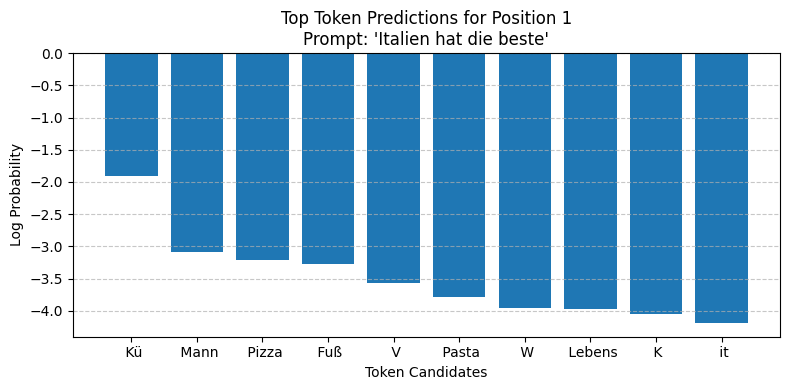

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

top_candidates_higher_temp = logprobs_higher_temp.get('top_logprobs')

# Process each token position
for idx, token_dict in enumerate(top_candidates_higher_temp):
    df = pd.DataFrame(token_dict.items(), columns=["token", "log_prob"])
    
    # Plot log probs directly
    plt.figure(figsize=(8, 4))
    plt.bar(df["token"], df["log_prob"])
    plt.xlabel("Token Candidates")
    plt.ylabel("Log Probability")
    plt.title(f"Top Token Predictions for Position {idx + 1}\nPrompt: 'Italien hat die beste'")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
rows, cols = [], []
for k, v in enumerate(top_candidates_higher_temp):
    for k, val in v.items():
        rows.append(k)
        cols.append(val)


In [ ]:
pd.DataFrame([rows, cols]).T

,0,1
0,Kü,-1.906157
1,Mann,-3.088257
2,Pizza,-3.207342
3,Fuß,-3.281921
4,V,-3.562426
5,Pasta,-3.786978
6,W,-3.958446
7,Lebens,-3.968187
8,K,-4.049765
9,it,-4.193665
